Ejercicio N°3
Importe y explore el conjunto de datos titanic.csv.

Realice una descripción general del conjunto de datos que incluya la descripción de la información brindada por cada columna, el tipo de datos que contiene cada una y el número de registros.

Realice cualquier tipo de limpieza y adecuación del dataset que considere necesaria para su posterior análisis, incluyendo manejo de valores faltantes y de datos duplicados y/o potencialmente erróneos.
(queda pendiente)

Calcule la media, la mediana y la desviación estándar de la edad de los/las pasajeros/as que murieron y sobrevivieron para cada clase. Realice un boxplot que muestre la distribución de edades para cada grupo (murieron/sobrevivieron) dentro de cada clase. ¿En qué clase las edades de las personas que sobrevivieron fueron más variables? ¿Cuál fue la edad de la persona más joven que sobrevivió en tercera clase?

Represente gráficamente la distribución de los precios de los pasajes en función de la clase del pasajero y calcule el promedio, la moda, la mediana, la desviación estándar y el rango intercuartil del precio del pasaje para cada grupo. ¿En qué clase los precios de pasaje presentaron una mayor variabilidad?

¿Qué medida resumen calcularía si quisiera conocer aquel valor que representa el precio que sólo el 25% de los pasajeros superaron a la hora de comprar su boleto?

Identifique cuáles fueron los pasajeros que pagaron un pasaje igual o más caro que el valor calculado en el ítem anterior. Construya una tabla en la que se informen los nombres de estas personas, el número total de personas vinculadas a ellas que se encontraban en el barco y la ciudad en la que embarcaron.

En base a la tabla construida en el ítem anterior, ¿con cuántos acompañantes, en promedio, viajaban estos pasajeros? ¿En qué puerto embarcó la mayoría de ellos?

Construya una tabla en la que se resuma la distribución de pasajeros del Titanic en función de la clase en la que viajaron. La misma debe contener la siguiente información (en distintas columnas): cantidad de pasajeros/as que viajaron en cada clase y porcentajes en relación al total. ¿A qué clase pertenecía la mayoría de los pasajeros del Titanic?

Construya una tabla de contingencia cruzando las variables survived y Pclass. ¿Qué proporción de personas de cada clase sobrevivieron al naufragio del Titanic? Represente gráficamente esta información en un gráfico de barras.

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
titanic = pd.read_csv("/content/titanic.csv")

In [198]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [199]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [200]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [201]:
titanic.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [202]:
titanic.isna().sum().to_frame().T.style # por comodidad lo transponemos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,0,418,0,0,0,263,0,0,0,1,1014,2,5,5,7,5,5,5,807,1179,5


In [203]:
titanic['Class'].unique()

array([ 3.,  1.,  2., nan])

In [204]:
titanic.head(1).style

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.000000,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S,691.000000,"Braund, Mr. Owen Harris",22.000000,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",nan,nan,3.000000


Realice una descripción general del conjunto de datos que incluya la descripción de la información brindada por cada columna, el tipo de datos que contiene cada una y el número de registros.

|#|variable|filas_no_nan|Dtype|Qué es|Ejemplo|          
|---|---|---|---|---|---|
|0   |PassengerId  |1309   |int64  |id|1|
|1   |Survived     |891    |float64|0 o 1 si sobrevivió|{0.0, 1.0}|
|2   |Pclass       |1309   |int64  |Clase|{1,2,3}|
|3   |Name         |1309   |object |Nombre|Braund, Mr. Owen Harris|
|4   |Sex          |1309   |object |Sexo|Male - Female|
|5   |Age          |1046   |float64|Edad|22.0|
|6   |SibSp        |1309   |int64  |número de hermanos, hermanas, hermanastros o hermanastras en el barco.|1, 0, 3, 4, 2, 5, 8|
|7   |Parch        |1309   |int64  |número de padres o hijos en el barco.|0|
|8   |Ticket       |1309   |object |id ticket|A/521171|
|9   |Fare         |1308   |float64|Tarifa|7.250000|
|10  |Cabin        |295    |object |Habitación|'D46', 'B73', 'C95'|
|11  |Embarked     |1307   |object |Puerto en el que subió|'S', 'C', 'Q', nan|
|12  |WikiId       |1304   |float64||691.,   90.,  865.|
|13  |Name_wiki    |1304   |object |||
|14  |Age_wiki     |1302   |float64|||
|15  |Hometown     |1304   |object |Lugar de procedencia|'Barre, Vermont, US', 'Chelsea,Michigan, US','Lysvik, Värmland, Sweden'
|16  |Boarded      |1304   |object |desconocido|'Southampton', 'Cherbourg', 'Queenstown', 'Belfast', nan|
|17  |Destination  |1304   |object |Destino|'Aberdeen, Washington, US','Groesbeck, Texas, US'|
|18  |Lifeboat     |502    |object ||'14?', 'D', '15', '?'|
|19  |Body         |130    |object ||'249MB', '275MB', '271MB'|
|20  |Class        |1304   |float64||3.,  1.,  2., nan|

In [205]:
titanic["WikiId"].unique()

array([ 691.,   90.,  865., ..., 1169., 1289.,  702.])

Calcule la media, la mediana y la desviación estándar de la edad de los/las pasajeros/as que murieron y sobrevivieron para cada clase.

In [206]:
# media, mediana y desviación estándar de la edad de los pasajeros que murieron y sobrevivieron para cada clase
titanic.groupby(["Survived", "Class"])["Age"].agg(["mean", "median", "std"])


mean  median        std
Survived Class                              
0.0      1.0    43.695312   45.25  15.284243
         2.0    33.544444   30.50  12.151581
         3.0    26.555556   25.00  12.334882
1.0      1.0    35.275772   35.00  13.741791
         2.0    25.924756   28.00  14.927583
         3.0    20.646118   22.00  11.995047

Realice un boxplot que muestre la distribución de edades para cada grupo (murieron/sobrevivieron) dentro de cada clase.

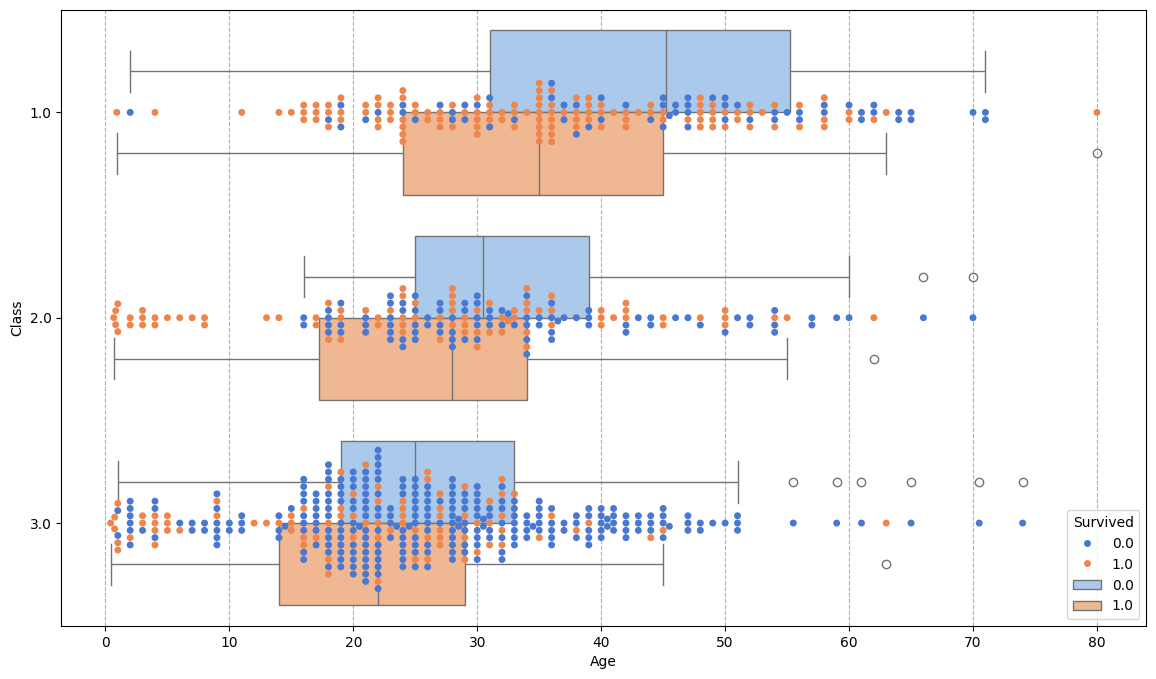

In [207]:
plt.figure(figsize=(14,8))
sns.swarmplot(data=titanic, x="Age", y="Class", orient="h", hue="Survived", palette="muted")
sns.boxplot(data=titanic, x="Age", y="Class", orient="h", hue="Survived", palette="pastel")

#sns.stripplot(data=titanic, x="Age", y="Class", orient="h",hue="Survived", palette="pastel", size=4, jitter=True, alpha=0.6, legend=False)
plt.grid(axis="x", linestyle="--")

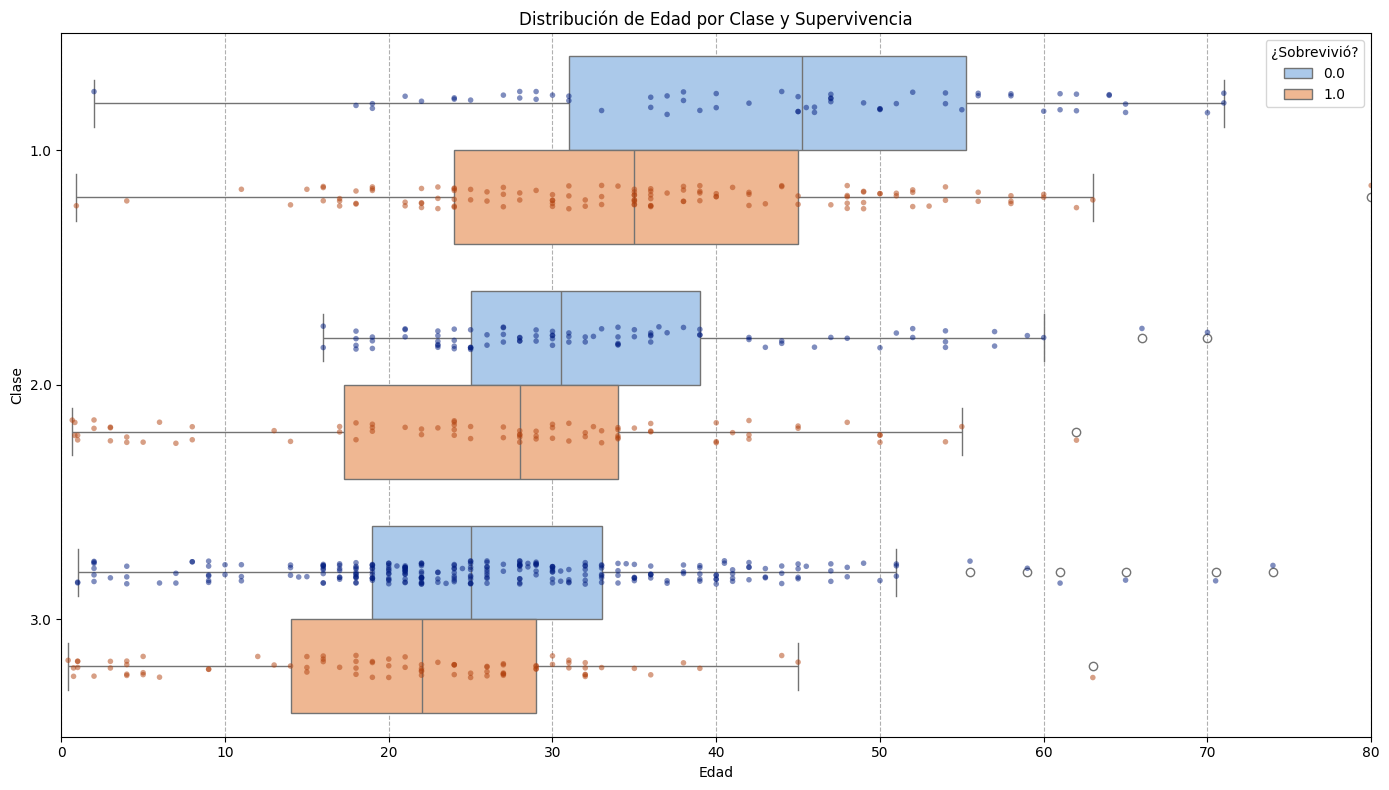

In [208]:
plt.figure(figsize=(14, 8))

sns.boxplot(data=titanic, x="Age", y="Class", orient="h", hue="Survived", palette="pastel")
sns.stripplot(data=titanic, x="Age", y="Class", orient="h", hue="Survived",
              palette="dark", size=4, jitter=True, alpha=0.5, dodge=True, legend=False)

plt.grid(axis="x", linestyle="--")
plt.xlim(0, 80)
plt.title("Distribución de Edad por Clase y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Clase")
plt.legend(title="¿Sobrevivió?", loc="upper right")
plt.tight_layout()
plt.show()


  ¿En qué clase las edades de las personas que sobrevivieron fueron más variables?

La clase con más variabilidad es la clase 1.

 ¿Cuál fue la edad de la persona más joven que sobrevivió en tercera clase?

In [209]:
sobrevivientes_clase3 = titanic[(titanic["Survived"] == 1.0) & (titanic["Pclass"] == 3)]
print(f"El sobreviviente más joven de la tercera clase tiene (o tuvo) {sobrevivientes_clase3['Age'].min() * 12:.0f} meses.")

El sobreviviente más joven de la tercera clase tiene (o tuvo) 5 meses.


Represente gráficamente la distribución de los precios de los pasajes en función de la clase del pasajero.

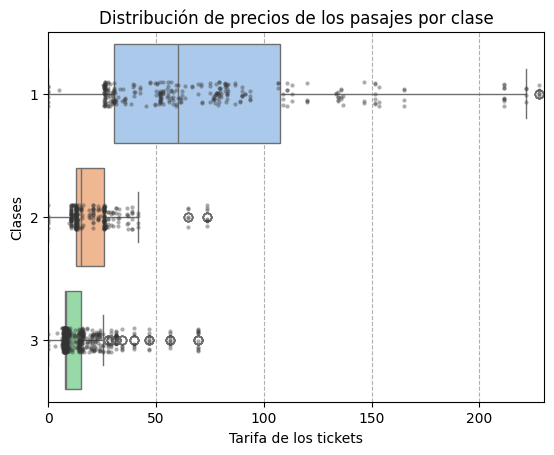

In [210]:
sns.boxplot(data=titanic, x="Fare", y="Pclass", orient="h", hue="Pclass", palette="pastel", legend=False)
sns.stripplot(data=titanic, x="Fare", y="Pclass", orient="h", size=3, color=".2", alpha=0.4, jitter=True)
plt.title("Distribución de precios de los pasajes por clase")
plt.xlabel("Tarifa de los tickets")
plt.ylabel("Clases")
plt.xlim(0, 230)
plt.grid(axis="x", linestyle="--")

Habiendo representado gráficamente la distribución de los precios de los pasajes en función de la clase del pasajero...
ahora calcule el **promedio**, la **moda**, la **mediana**, la **desviación estándar** y el **rango intercuartil** del precio del pasaje para cada grupo.

In [211]:
sobrevivientes = titanic[titanic["Survived"] == 1.0]
medidas = sobrevivientes.groupby("Pclass")["Fare"].agg(["mean",
                                                        "median",
                                                        "std"])
q1 = sobrevivientes.groupby("Pclass")["Fare"].quantile(0.25)
q3 = sobrevivientes.groupby("Pclass")["Fare"].quantile(0.75)
RIQ = q3 - q1
medidas["RIQ"] = RIQ

medidas["mode"] = sobrevivientes.groupby("Pclass")["Fare"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
medidas

,mean,median,std,RIQ,mode
Pclass,,,,,
1,95.608029,77.9583,85.286820,60.495775,26.55
2,22.055700,21.0000,10.853502,13.250000,13.00
3,13.694887,8.5167,10.692993,8.100000,7.75


- ¿En qué clase los precios de pasaje presentaron una mayor variabilidad?

A simple vista podemos visualizar que la clase que presenta más variabilidad es la 1, que va desde aproximadamente precio 30 a aproximadamente 110. Esto se corrobora más formalmente con las medidas obtenidas, siendo la clase 1 con mayor desvío estandar y rango intercuartílico posee. Seguida por la clase 2 y por último la clase 3

- ¿Qué medida resumen calcularía si quisiera conocer aquel valor que representa el precio que sólo el 25% de los pasajeros superaron a la hora de comprar su boleto?

In [212]:
q3_detodos = titanic["Fare"].quantile(0.75)
print(f"El valor de tarifa que superaron el 25% de los pasajeros corresponde al cuartil 3, que es: ${q3_detodos:.2f}.")

El valor de tarifa que superaron el 25% de los pasajeros corresponde al cuartil 3, que es: $31.27.


- Identifique cuáles fueron los pasajeros que pagaron un pasaje igual o más caro que el valor calculado en el ítem anterior. Construya una tabla en la que se informen los nombres de estas personas, el número total de personas vinculadas a ellas que se encontraban en el barco y la ciudad en la que embarcaron.


In [213]:
chetos = titanic[titanic["Fare"] > q3_detodos]
chetos_datos = chetos[["Name", "Embarked"]].rename(columns={"Name": "Nombre", "Embarked": "Ciudad_de_embarque"})
chetos_datos["Ciudad_de_embarque"] = chetos_datos["Ciudad_de_embarque"].replace({"Q": "Queenstown", "S": "Southampton", "C": "Cherbourg"})
chetos_datos["Familiares"] = chetos["SibSp"] + chetos["Parch"]
chetos_datos


,Nombre,Ciudad_de_embarque,Familiares
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cherbourg,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Southampton,1
6,"McCarthy, Mr. Timothy J",Southampton,0
23,"Sloper, Mr. William Thompson",Southampton,0
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",Southampton,6
...,...,...,...
1293,"Gibson, Miss. Dorothy Winifred",Cherbourg,1
1294,"Carrau, Mr. Jose Pedro",Southampton,0
1298,"Widener, Mr. George Dunton",Cherbourg,2
1302,"Minahan, Mrs. William Edward (Lillian E Thorpe)",Queenstown,1


En base a la tabla construida en el ítem anterior,
- ¿con cuántos acompañantes, en promedio, viajaban estos pasajeros?
- ¿En qué puerto embarcó la mayoría de ellos?

In [236]:
mayor_embarque = chetos_datos["Ciudad_de_embarque"].value_counts().idxmax()
print(f"Estos pasajeros viajaban en promedio con {chetos_datos['Familiares'].mean():.2f} familiares.\nLa mayoría embarcó en {mayor_embarque}")

Estos pasajeros viajaban en promedio con 1.80 familiares.
La mayoría embarcó en Southampton


Construya una tabla en la que se resuma la distribución de pasajeros del Titanic en función de la clase en la que viajaron. La misma debe contener la siguiente información (en distintas columnas):
- cantidad de pasajeros/as que viajaron en cada clase y porcentajes en relación al total. ¿A qué clase pertenecía la mayoría de los pasajeros del Titanic?

In [256]:
conteos = titanic["Pclass"].value_counts().sort_index()

porcentajes = (conteos / conteos.sum()) * 100

tabla_detalle = pd.DataFrame({
    "Cantidad": conteos,
    "Porcentajes (%)": porcentajes.round(2)
})
print(f"{tabla_detalle}\nLa mayoría de los pasajeros del Titanic viajaban en tercera clase (aproximadamente el 54%).")

        Cantidad  Porcentajes (%)
Pclass                           
1            323            24.68
2            277            21.16
3            709            54.16
La mayoría de los pasajeros del Titanic viajaban en tercera clase (aproximadamente el 54%).


- Construya una tabla de contingencia cruzando las variables survived y Pclass.
- ¿Qué proporción de personas de cada clase sobrevivieron al naufragio del Titanic?
- Represente gráficamente esta información en un gráfico de barras.

In [276]:
tabla_contingencia = pd.crosstab(titanic["Survived"],titanic["Pclass"], normalize="index")
tabla_contingencia

Pclass,1,2,3
Survived,,,
0.0,0.145719,0.176685,0.677596
1.0,0.397661,0.254386,0.347953


In [290]:
sns.barplot(data=tabla_contingencia)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

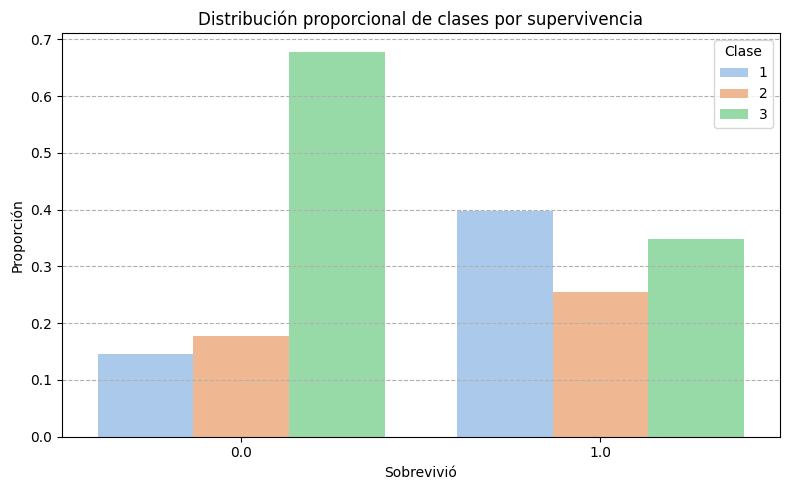

In [291]:
tabla_larga = tabla_contingencia.reset_index().melt(id_vars="Survived",
                                                     var_name="Pclass",
                                                     value_name="Proporcion")
plt.figure(figsize=(8, 5))
sns.barplot(data=tabla_larga, x="Survived", y="Proporcion", hue="Pclass", palette="pastel")

# 5. Detalles estéticos
plt.title("Distribución proporcional de clases por supervivencia")
plt.ylabel("Proporción")
plt.xlabel("Sobrevivió")
plt.grid(axis="y", linestyle="--")
plt.legend(title="Clase")
plt.tight_layout()
plt.show()

In [283]:
tabla_larga

,Survived,Pclass,Proporcion
0,0.0,1,0.145719
1,1.0,1,0.397661
2,0.0,2,0.176685
3,1.0,2,0.254386
4,0.0,3,0.677596
5,1.0,3,0.347953
